In [11]:
"""
Created on Mon Mar  6 21:12:54 2023

@author: smfen
"""

# DSCI 441 Project

import pandas as pd
from dataprep.eda import create_report
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt

# First upload the data set into Python
train = pd.read_csv("mitbih_train.csv", header=None)

# See preliminary dataframe size
print(data.size)

# Set the target variable (this is the last column of numbers in the DF)
train_y = train.iloc[:, -1]
train_y = train_y.astype('int')
train_y.head()


16460152


0    0
1    0
2    0
3    0
4    0
Name: 187, dtype: int64

In [5]:
# Set the rest of the columns as the x-variables (all other)
train_x = train.iloc[:, :-1]
train_x.head()


,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Set to floats
train_x = train_x.astype('float')
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Finding the occurences of each type of beat classification. 
unique, counts = np.unique(train_y, return_counts=True)
print(f'unique values: {unique}')
print(f'counts: {counts}')

unique values: [0 1 2 3 4]
counts: [72471  2223  5788   641  6431]


In [8]:
# Create dict so that each unique classification goes with class name.
class_names = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}

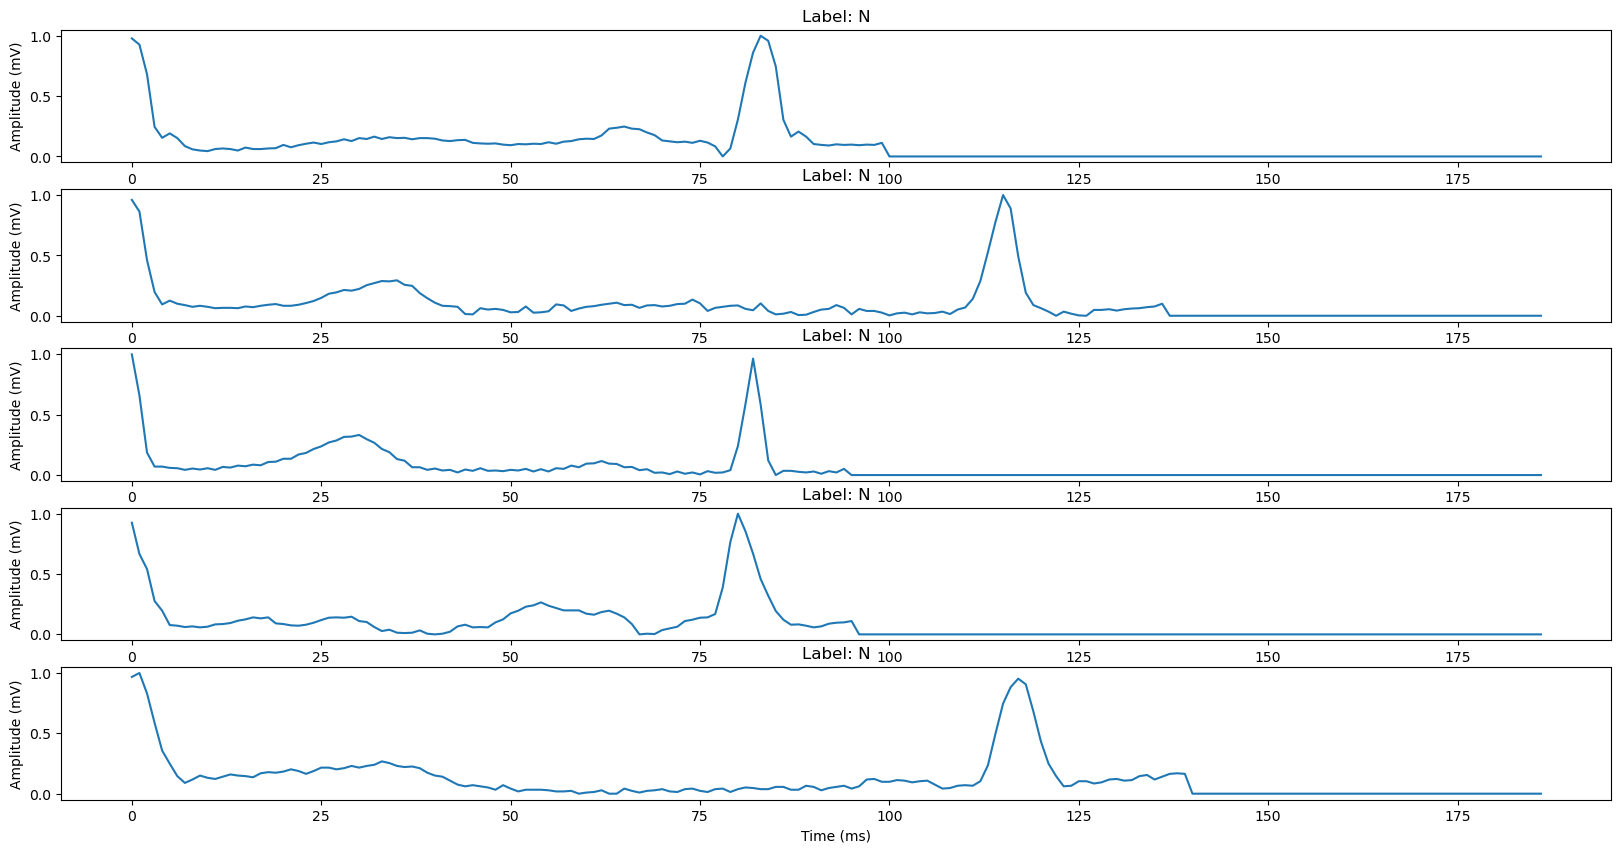

In [12]:
#plot the first 5 ecg signals in the dataset and their corresponding labels 
fig, ax = plt.subplots(5, 1, figsize=(20, 10))
for i in range(5):
    ax[i].plot(train_x.iloc[i, :])
    ax[i].set_title(f'Label: {class_names[train_y[i]]}')
    ax[i].set_xlabel('Time (ms)')
    ax[i].set_ylabel('Amplitude (mV)')

In [19]:
from os import listdir 
import wfdb #This package will likely need to be pip installed.

#specify data path to directory with full annotations
path = 'mit-bih-arrhythmia-database-1.0.0/'

#This time, split it up by patients. I went through the zip file and\
# and examined the patients number directly and marked them down. 
patients = ['100', '101', '102', '103', '104', '105', '106', '107', 
           '108', '109', '111', '112', '113', '114', '115', '116', 
           '117', '118', '119', '121', '122', '123', '124', '200',
           '201', '202', '203', '205', '207', '208', '209', '210', 
           '212', '213', '214', '215', '217', '219', '220', '221', 
           '222', '223', '228', '230', '231', '232', '233', '234']

In [24]:
data = pd.DataFrame()

# Here we are extracting the individual files from the zip file based on patient
for pat in patients:
    file = path + pat
    annotation = wfdb.rdann(file, 'atr')
    sym = annotation.symbol
    
    values, counts = np.unique(sym, return_counts=True)
    data_sub = pd.DataFrame({'sym' :values, 'val':counts, 'pat':[pat]*len(counts)})
    data = pd.concat([data, data_sub], axis=0)
# The reason we moved to these data was for the larger classification
# Now we see the 23 groups, instead of 5 from the previous data above.
data.groupby('sym').val.sum().sort_values(ascending = False)

sym
N    75052
L     8075
R     7259
V     7130
/     7028
A     2546
+     1291
f      982
F      803
~      616
!      472
"      437
j      229
x      193
a      150
|      132
E      106
J       83
Q       33
e       16
[        6
]        6
S        2
Name: val, dtype: int64

In [26]:
#Some of these don't represent beats though, so let's sort
# Here is the cheat sheet: https://archive.physionet.org/physiobank/annotations.shtml
nbeat = ['Q', '?', '[', ']', '!', 'x', '(', ')', 'p', 't', 'u', '`', 
         '\'', '^', '|', '~', '+', 's', 'T', '*', 'D', '=', '"', '@']
arry = ['L', 'R', 'B', 'A', 'a', 'J', 'S', 'V', 'r', 'F', 'e', 'j', 
       'n', 'E', 'f', '/']

# A labeled beat of 'N' is sinus rythm = normal 
data['cat'] = -1 #Not a beat
data.loc[data.sym=='N', 'cat'] = 0 # Sinus rythm 
data.loc[data.sym.isin(arry), 'cat'] =1 # Arrhythmia beat
# Print out number of each classification
data.groupby('cat').val.sum()

cat
-1     3186
 0    75052
 1    34409
Name: val, dtype: int64

In [30]:
#Now we must load that actual ECG file. Classifications were above.
def load_ecg(file):
    #load the actual ecg file
    record = wfdb.rdrecord(file)
    # annotation
    anno = wfdb.rdann(file, 'atr')
    # get signal
    p_sig = record.p_signal
    # make sure the frequency is 360, if not could run into issue
    assert record.fs == 360, 'sample freq is not 360'

    # Symbols and annotation index
    atr_sym = annotation.symbol
    atr_samp = annotation.sample
    
    return p_sig, atr_sym, atr_samp

#Examining an example patient and the type of annotated beats 
file = path + patients[0]
p_sig, atr_sym, atr_samp = load_ecg(file)
values, counts = np.unique(sym, return_counts=True)
for v,c in zip(values, counts):
    print(v,c)

+ 3
J 50
N 2700
V 3
~ 8


In [38]:
#Let's view some of the abnormal beats
ab_index = [b for a,b in zip(atr_sym, atr_samp) if a in arry][:10]
ab_index

[304523,
 304697,
 304890,
 305063,
 305229,
 305426,
 305622,
 305833,
 306055,
 306267]

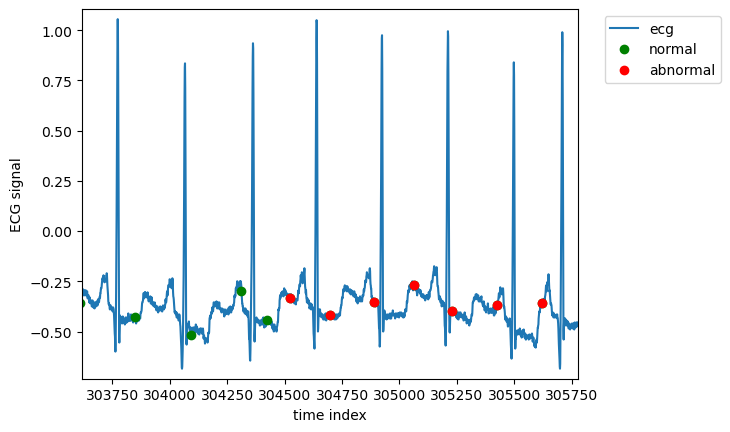

In [39]:
x = np.arange(len(p_sig))

left = ab_index[1]-1080
right = ab_index[1]+1080

plt.plot(x[left:right], p_sig[left:right,0], '-', label='ecg',)
plt.plot(x[atr_samp], p_sig[atr_samp,0], 'go', label='normal')
plt.plot(x[ab_index], p_sig[ab_index,0], 'ro',label='abnormal')

plt.xlim(left,right)
plt.ylim(p_sig[left:right].min()-0.05, p_sig[left:right,0].max()+0.05)
plt.xlabel('time index')
plt.ylabel('ECG signal')
plt.legend(bbox_to_anchor = (1.04, 1), loc = 'upper left')
plt.show()